In [34]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

from rent_module import rent_funcs

In [35]:
# записываем даннные в датафрейм объект
df = pd.read_csv('../data/raw/_data.csv')

In [36]:
# Убираем столбец "Unnamed: 0"
df.drop('Unnamed: 0', inplace=True, axis=1)

In [37]:
# работаем с колонками от 11 и дальше
df.iloc[:, 11:]

,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,Евроремонт,NaN,Лоджия (1),Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525


In [38]:
# признак "Ремонт"
df['Ремонт'].unique()

array(['Дизайнерский', 'Евроремонт', 'Косметический', nan, 'Без ремонта'],
      dtype=object)

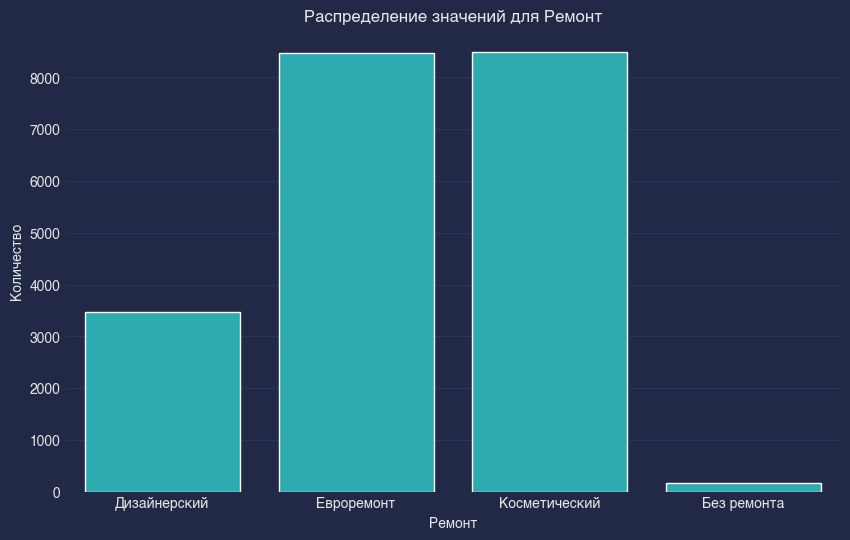

In [39]:
rent_funcs.count_plot(df, 'Ремонт')

Признак "Ремонт" - категориальный номинальный. Не считая пропуски в наших данных есть 4 вида ремонта - Дизайнерский, Евроремонт, Косметический и без ремонта

In [40]:
# признак Площадь комнат
df.loc[0:20,'Площадь комнат, м2']

0                NaN
1        25 25 20 25
2                NaN
3        14-42-20-19
4              20 18
5                NaN
6     43-25-25-25-22
7           26 22 15
8           45 25 25
9        16 14 16 20
10       16-40-20-18
11               NaN
12                80
13               180
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19    24-22-24-28-64
20             32-18
Name: Площадь комнат, м2, dtype: object

Признак "Площадь комнат" - количественный дискретный. В наших данных имеет все возможные способы записи (через -, +, / и пробел)

In [41]:
# признак Балкон
df['Балкон'].unique()

array([nan, 'Балкон (1)', 'Балкон (3)', 'Лоджия (1)',
       'Балкон (2), Лоджия (3)', 'Балкон (1), Лоджия (1)', 'Балкон (2)',
       'Лоджия (2)', 'Балкон (3), Лоджия (3)', 'Балкон (3), Лоджия (1)',
       'Лоджия (3)', 'Балкон (1), Лоджия (2)', 'Балкон (2), Лоджия (1)',
       'Балкон (2), Лоджия (2)', 'Балкон (1), Лоджия (3)', 'Балкон (4)',
       'Лоджия (4)', 'Балкон (4), Лоджия (4)', 'Балкон (1), Лоджия (4)'],
      dtype=object)

Признак "Балкон" дал нам 2 категории (Балкон и Лоджия), а так же количественный дискретный признак - количество тех самых балконов и лоджий в разных пропорциях

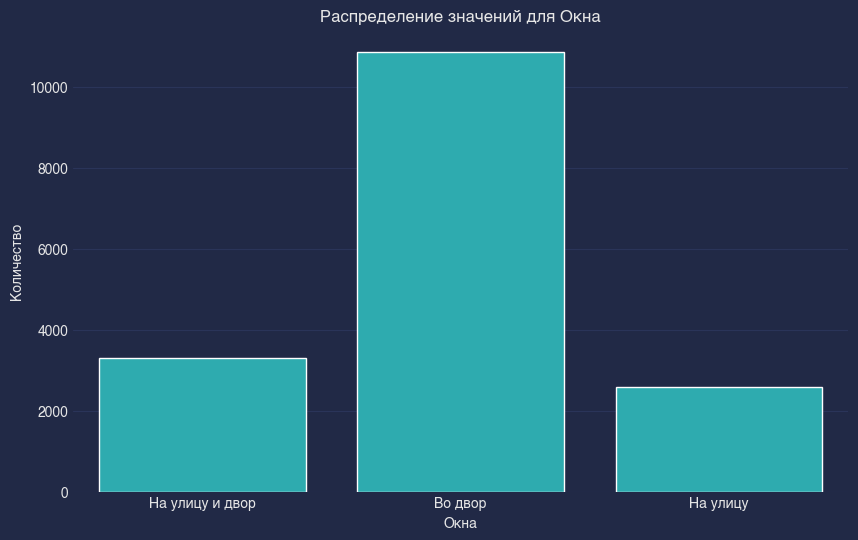

In [42]:
# признак "Окна"
rent_funcs.count_plot(df, 'Окна')

Окна - категориальный номинальный признак с 3 вариантами. На улицу и двор, во двор и на улицу.

In [43]:
# признак Санузел
df['Санузел'].unique()

array([nan, 'Совмещенный (2), Раздельный (1)', 'Совмещенный (3)',
       'Совмещенный (2)', 'Совмещенный (1), Раздельный (1)',
       'Совмещенный (1)', 'Совмещенный (2), Раздельный (2)',
       'Раздельный (2)', 'Раздельный (1)', 'Раздельный (3)',
       'Совмещенный (4)', 'Совмещенный (3), Раздельный (1)',
       'Раздельный (4)', 'Совмещенный (1), Раздельный (2)',
       'Совмещенный (2), Раздельный (4)',
       'Совмещенный (1), Раздельный (3)',
       'Совмещенный (3), Раздельный (3)',
       'Совмещенный (4), Раздельный (2)',
       'Совмещенный (2), Раздельный (3)',
       'Совмещенный (4), Раздельный (1)',
       'Совмещенный (3), Раздельный (2)'], dtype=object)

У санузлов мы опять видим 2 номинальные категории (Совмещенный и раздельный), а так же их дискретное количество

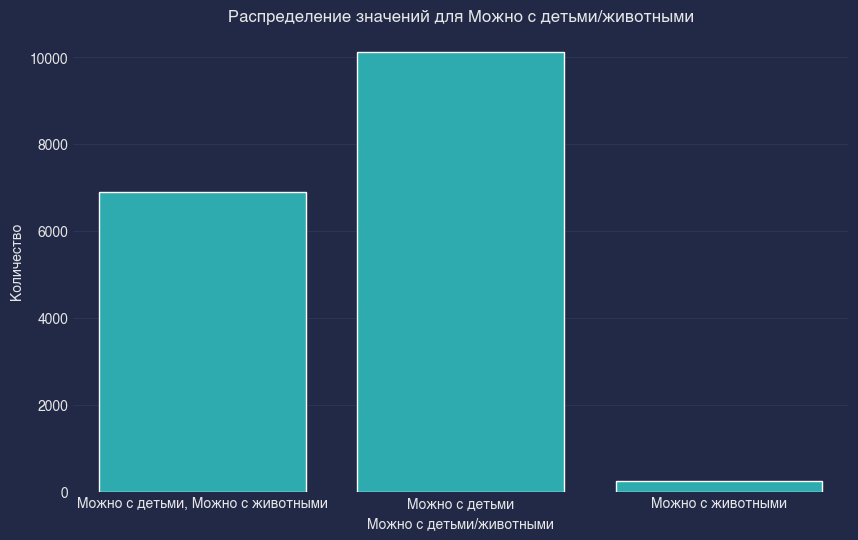

In [44]:
# признак Можно с детьми/животными
rent_funcs.count_plot(df, 'Можно с детьми/животными')

Можно с детьми/животными - категориальный признак с 3 вариантами

In [45]:
# Признак Дополнительно
dop_features = ','.join(df['Дополнительно'].dropna())
dop_features = dop_features.split(',')
dop_features = list(map(str.strip, dop_features))

In [46]:
set(dop_features)

{'Ванна',
 'Душевая кабина',
 'Интернет',
 'Кондиционер',
 'Мебель в комнатах',
 'Мебель на кухне',
 'Посудомоечная машина',
 'Стиральная машина',
 'Телевизор',
 'Телефон',
 'Холодильник'}

Тут мы имеем разные комбинации из 11 бинарных признаков. По наличию разных штук в квартире.

In [47]:
# признак Название ЖК
df['Название ЖК'].nunique()

1798

1798 различных Жилых комплексов (категориальный номинальный признак)

In [48]:
# признак Серия дома
df['Серия дома'].nunique()

393

Признак с 393 разными сериями домов (чтобы это ни значило)

In [49]:
# признак Высота потолков
df['Высота потолков, м'].nunique()

95

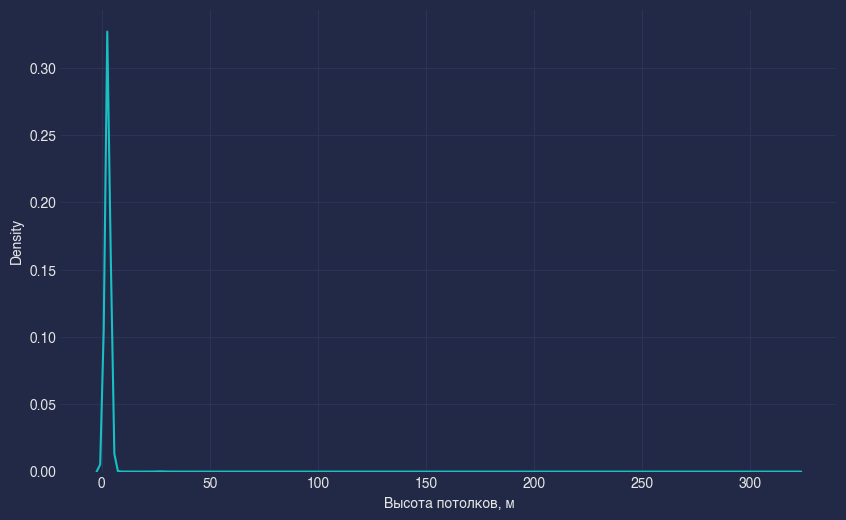

In [50]:
# на данном графике вы видим наличие ошибок в данных (скорее всего кто-то вбил сантиметры там, где были метры)
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=df, x='Высота потолков, м', ax=ax);

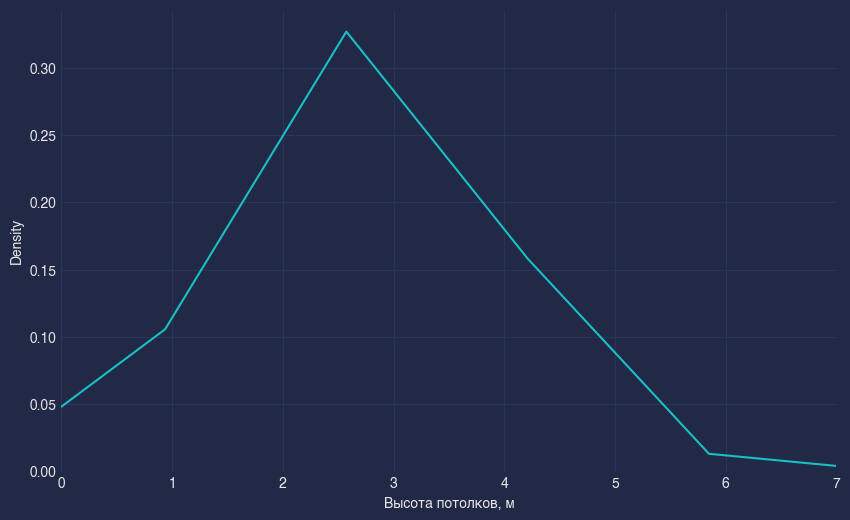

In [51]:
# добавим лимиты для более адекватного отображения

fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=df, x='Высота потолков, м', ax=ax)

plt.xlim(0, 7);

Тут можно увидеть примерное распределение высоты потолков в квартирах (и что в ряде квартир она подозрительно маленькая, но с этим мы будем разбираться позже)

In [52]:
# признак Лифт
df['Лифт'].unique()

array(['Пасс (4), Груз (1)', 'Пасс (1), Груз (1)', 'Пасс (1)', nan,
       'Пасс (3)', 'Пасс (4)', 'Пасс (2), Груз (1)', 'Пасс (2)',
       'Пасс (2), Груз (2)', 'Пасс (3), Груз (3)', 'Груз (4)',
       'Пасс (3), Груз (1)', 'Груз (1)', 'Пасс (1), Груз (2)', 'Груз (2)',
       'Пасс (3), Груз (2)', 'Пасс (4), Груз (4)', 'Пасс (2), Груз (3)',
       'Пасс (4), Груз (2)', 'Груз (3)', 'Пасс (1), Груз (3)',
       'Пасс (4), Груз (3)', 'Пасс (5), Груз (1)', 'Пасс (1), Груз (12)',
       'Пасс (60)', 'Пасс (6)', 'Пасс (8), Груз (8)', 'Пасс (7)',
       'Пасс (1), Груз (4)', 'Пасс (50)', 'Пасс (5), Груз (3)',
       'Пасс (2), Груз (4)', 'Груз (6)', 'Груз (8)', 'Пасс (5)'],
      dtype=object)

Тут мы можем наблюдать 2 номинальные категории (Пассажирский и грузовой лифт), а так же их дискретное количество

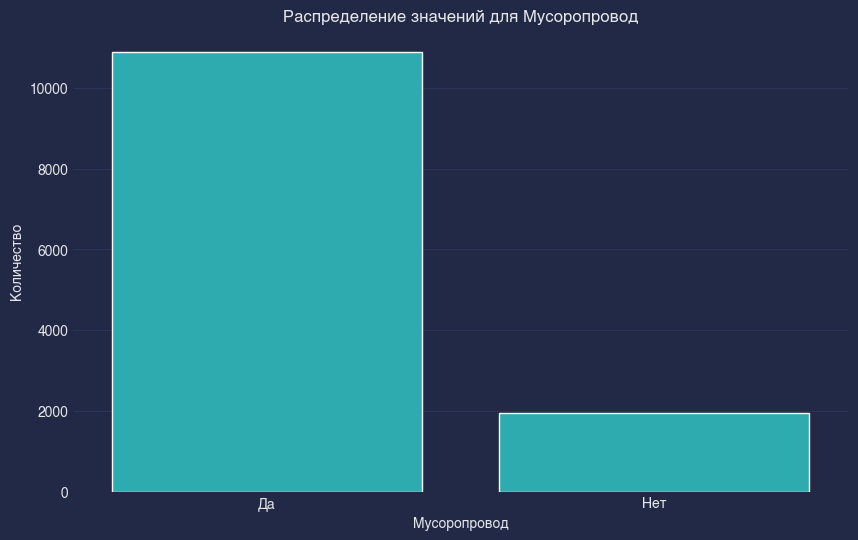

In [53]:
# признак Мусоропровод
rent_funcs.count_plot(df, 'Мусоропровод')

Бинарный категориальный признак.

Ну и последний признак - ссылка на объявление. Может помочь для конкретизации какой-либо информации.